**Análise exploratória dos dados**

**Importação das bibliotecas essenciais para análise**:

    Pandas para manipulação de dados, matplotlib e seaborn para visualização.

**Etapas:**

    Leitura de um arquivo CSV com dados de clientes (10.000 registros e 18 colunas).

    Exibição da forma do dataframe para conhecer dimensões (10000 linhas, 18 colunas).

    Visualização das primeiras linhas para inspeção das variáveis, que incluem identificadores, características demográficas, financeiras, comportamento de churn, reclamações, satisfação e outras métricas.

    Cálculo de estatísticas descritivas básicas para quantificar variáveis numéricas, mostrando contagem, média, desvio padrão, valores mínimo, máximo e quartis.

    Explorou colunas como pontuação de crédito, idade, saldo em conta, número de produtos, se possui cartão de crédito, se é membro ativo, salário estimado, e se o cliente saiu ou não (churn).

**Objetivos e contexto da análise**:

    Preparar a base para entender características dos clientes churn e os que permaneceram. Identificar principais variáveis que podem influenciar a saída do cliente. Visualizar distribuições e correlações iniciais para orientar futuras modelagens preditivas ou segmentações.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [4]:
df.shape

(10000, 18)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Descrição das colunas:

    CustomerId = Número da conta
    Credit_score = Pontuação de crédito
    Country = País de residência
    Gender = genero
    Age = Idade
    Tenure = Quantidade de anos em que a conta existe na ABC Bank
    Balance= Balanço da conta
    Products_number= Número de produtos do banco
    Credit_card = Se o cliente possui cartão de crédito
    active_member = Se o cliente está ativo
    Exited =  Se o cliente deixou o banco em algum momento (0 = negativo; 1 = positivo)

In [6]:
df = df.drop(columns=['RowNumber'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64


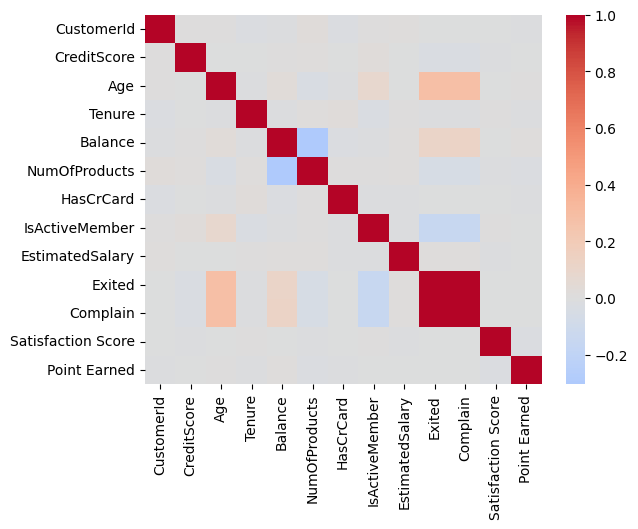

In [9]:
correlacao = df.corr(numeric_only=True)['Exited'].sort_values(ascending=False)
print(correlacao)

sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', center=0)
plt.show()

Verificando a relação das variáveis com o Churn

Exited
0    7962
1    2038
Name: count, dtype: int64
Taxa de Churn: 20.38%


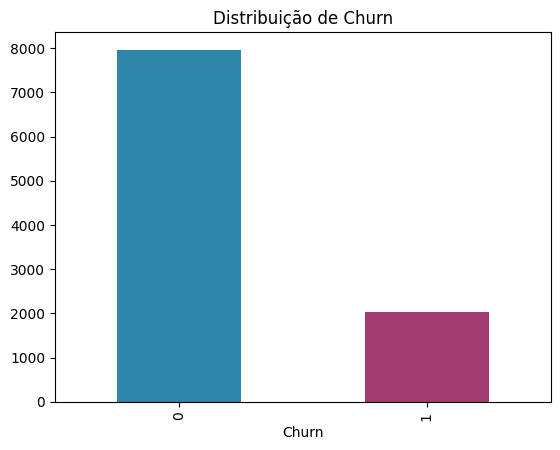

In [10]:
print(df['Exited'].value_counts())
print(f"Taxa de Churn: {df['Exited'].mean():.2%}")

df['Exited'].value_counts().plot(kind='bar', color=['#2E86AB', '#A23B72'])
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.show()

O gráfico mostra um desequilíbrio significativo nos dados:

Disparidade 80/20: A grande maioria (~80% ou ~8.000) dos clientes não cancelou (0), enquanto apenas ~20% (~2.000) cancelaram (1).

Risco de "Falsa" Acurácia: Um modelo pode acertar 80% das vezes apenas dizendo que "ninguém cancela", o que seria inútil.

Volume Aceitável: Apesar de minoritária, a classe de churn tem ~2.000 exemplos, o que é suficiente para treinar bons modelos.

Ação necessária: Você precisará usar técnicas de balanceamento (como SMOTE) e focar em métricas como F1-Score ou Recall, e não apenas na acurácia simples.

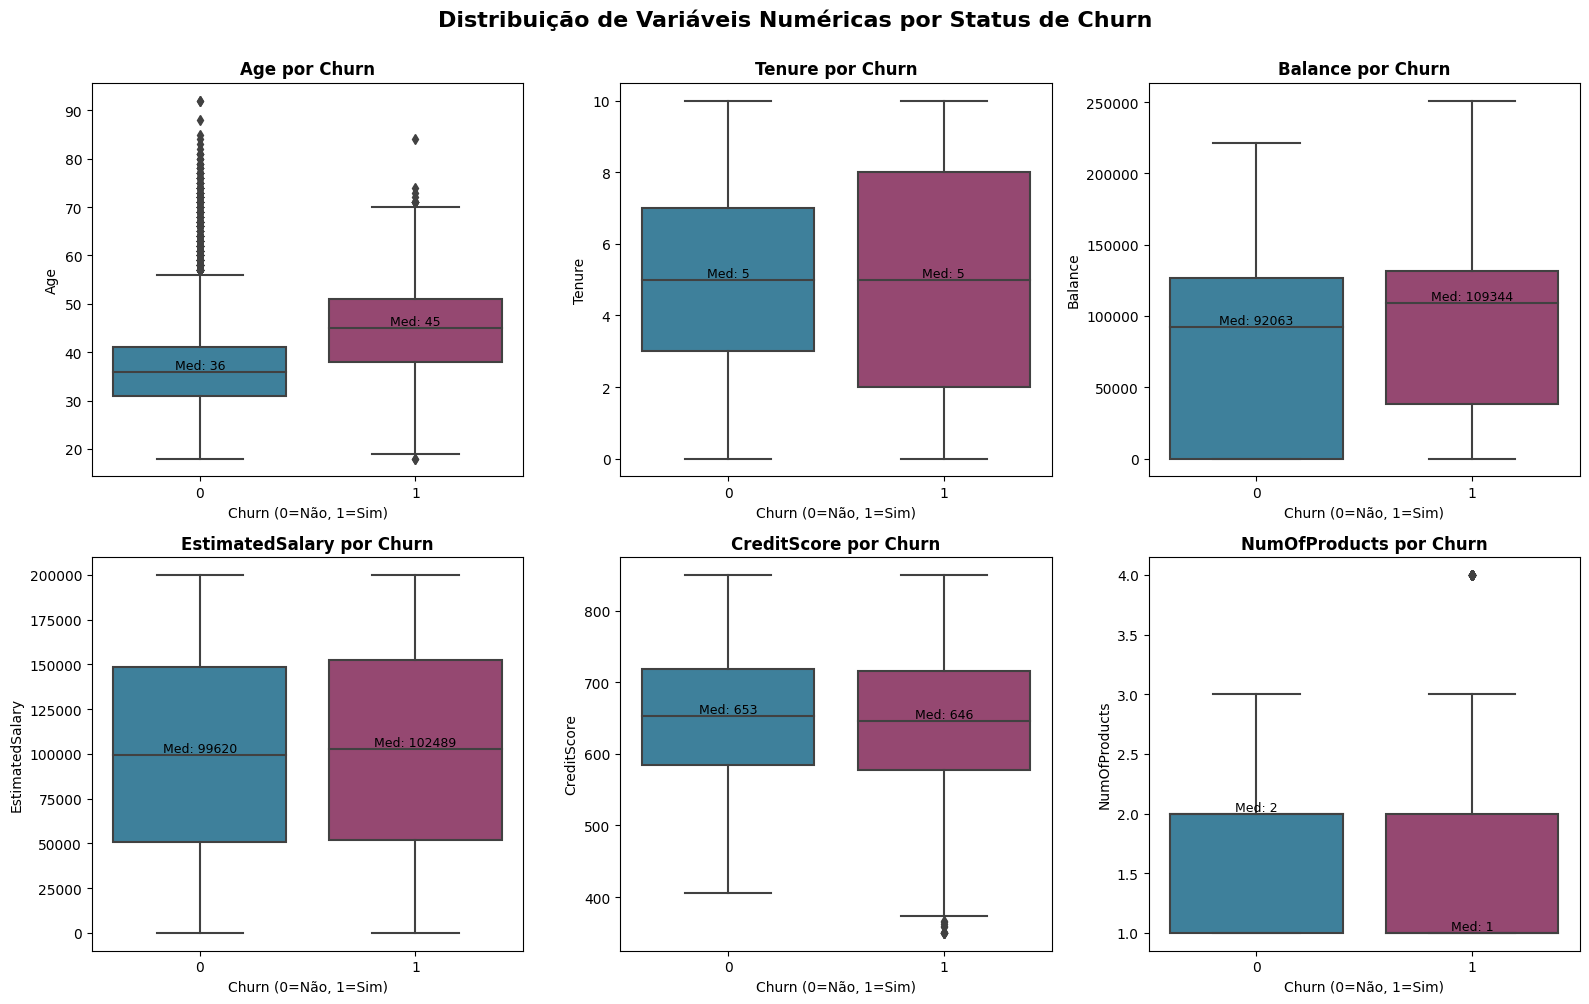

In [11]:
# Variáveis numéricas principais
numeric_vars = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 
                'CreditScore', 'NumOfProducts']

# Criar figura com múltiplos subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição de Variáveis Numéricas por Status de Churn', 
             fontsize=16, fontweight='bold', y=1.00)

for idx, var in enumerate(numeric_vars):
    row = idx // 3
    col = idx % 3
    
    sns.boxplot(data=df, x='Exited', y=var, ax=axes[row, col], 
                palette=['#2E86AB', '#A23B72'])
    axes[row, col].set_title(f'{var} por Churn', fontweight='bold')
    axes[row, col].set_xlabel('Churn (0=Não, 1=Sim)')
    axes[row, col].set_ylabel(var)
    
    # Adicionar estatísticas
    for i in [0, 1]:
        median = df[df['Exited'] == i][var].median()
        axes[row, col].text(i, median, f'Med: {median:.0f}', 
                           ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Os boxplots revelam o perfil claro do cliente com maior risco de sair (Churn):

1.  **Mais Velho:** A idade é o maior diferencial. Quem sai tem mediana de 45 anos, contra 36 de quem fica.
2.  **Saldo Mais Alto:** Clientes que cancelam têm saldos maiores (~109k) do que os fiéis (~92k). O banco está perdendo capital.
3.  **Menos Produtos:** Quem sai geralmente tem apenas 1 produto. Quem fica tem 2 (mediana).

**Conclusão:** O banco perde clientes maduros e com dinheiro, mas pouco engajados (apenas 1 produto). **Ação:** Focar em *cross-selling* (vender o 2º produto) e ofertas para o público de 40-50 anos. Variáveis como Salário e Score de Crédito não influenciam a decisão.

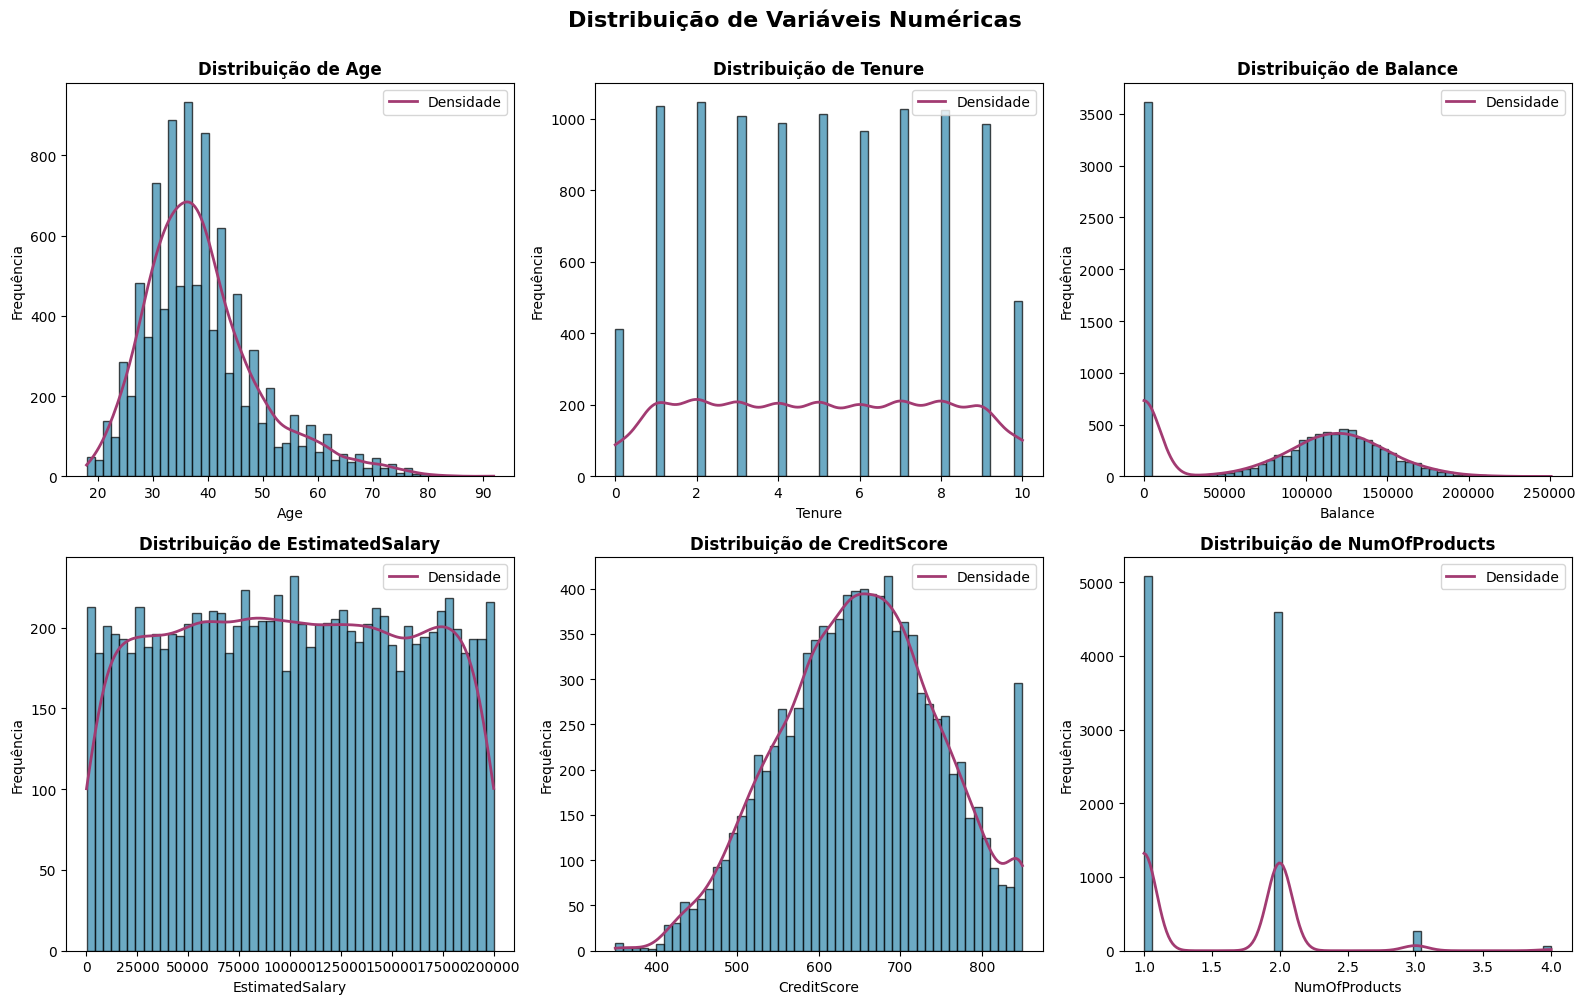

In [12]:
# Criar histogramas com distribuição de densidade
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição de Variáveis Numéricas', 
             fontsize=16, fontweight='bold', y=1.00)

for idx, var in enumerate(numeric_vars):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].hist(df[var], bins=50, alpha=0.7, 
                        color='#2E86AB', edgecolor='black')
    
    # Adicionar linha de densidade
    from scipy.stats import gaussian_kde
    density = gaussian_kde(df[var].dropna())
    xs = np.linspace(df[var].min(), df[var].max(), 200)
    axes[row, col].plot(xs, density(xs) * len(df[var]) * (df[var].max() - df[var].min()) / 50,
                       color='#A23B72', linewidth=2, label='Densidade')
    
    axes[row, col].set_title(f'Distribuição de {var}', fontweight='bold')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequência')
    axes[row, col].legend()

plt.tight_layout()
plt.show()


Os histogramas mostram um banco generalista com dois grupos financeiros distintos:

1.  **Saldo (Balance):** Bimodal. Há um grupo massivo com **saldo ZERO** e outro com saldo alto (~125k). Tratar esses perfis separadamente é crucial.
2.  **Produtos:** A maioria tem apenas 1 ou 2 produtos. Clientes com 3+ são raros. **Cross-selling** (vender o 2º produto) é a maior alavanca de crescimento.
3.  **Idade:** Concentrada em jovens-adultos (30-40 anos), com menos clientes nas faixas de maior churn (40-50+).
4.  **Generalista:** Salário e tempo de casa são distribuídos uniformemente, indicando que o banco atende todos os perfis sem nichos específicos.

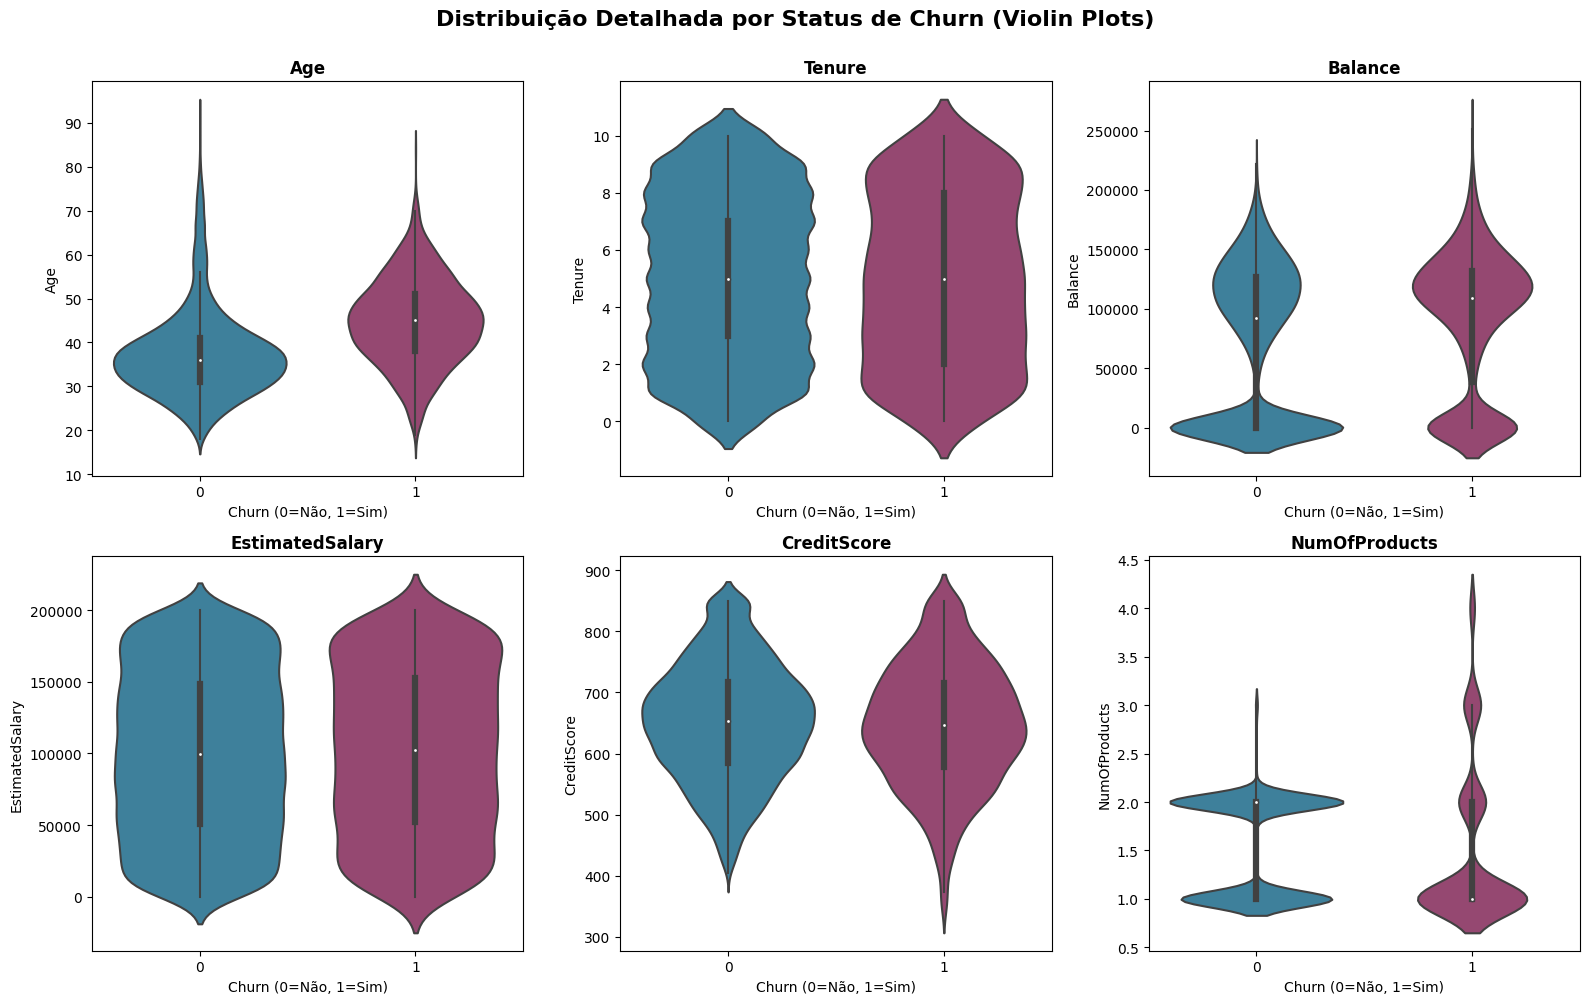

In [13]:
# Violin plots para comparação entre churn
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição Detalhada por Status de Churn (Violin Plots)', 
             fontsize=16, fontweight='bold', y=1.00)

for idx, var in enumerate(numeric_vars):
    row = idx // 3
    col = idx % 3
    
    sns.violinplot(data=df, x='Exited', y=var, ax=axes[row, col],
                   palette=['#2E86AB', '#A23B72'])
    axes[row, col].set_title(f'{var}', fontweight='bold')
    axes[row, col].set_xlabel('Churn (0=Não, 1=Sim)')
    axes[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()


Os Violin Plots mostram nuances cruciais:

1.  **Saldo Zero Retém Clientes:** A base larga do violino azul mostra que clientes com saldo zero raramente cancelam. O risco está concentrado em quem tem saldo alto (~120k).
2.  **Armadilha do Produto Único:** Quase todo o churn vem de clientes com apenas 1 produto. Quem tem 2 produtos é muito mais fiel.
3.  **Confirmação de Idade:** O perfil de churn tem a mesma forma, apenas acontece em idade mais avançada (40-50 anos).
4.  **Irrelevância:** Score de Crédito e Tempo de Casa têm formas idênticas para quem fica e quem sai, confirmando que não influenciam a decisão.

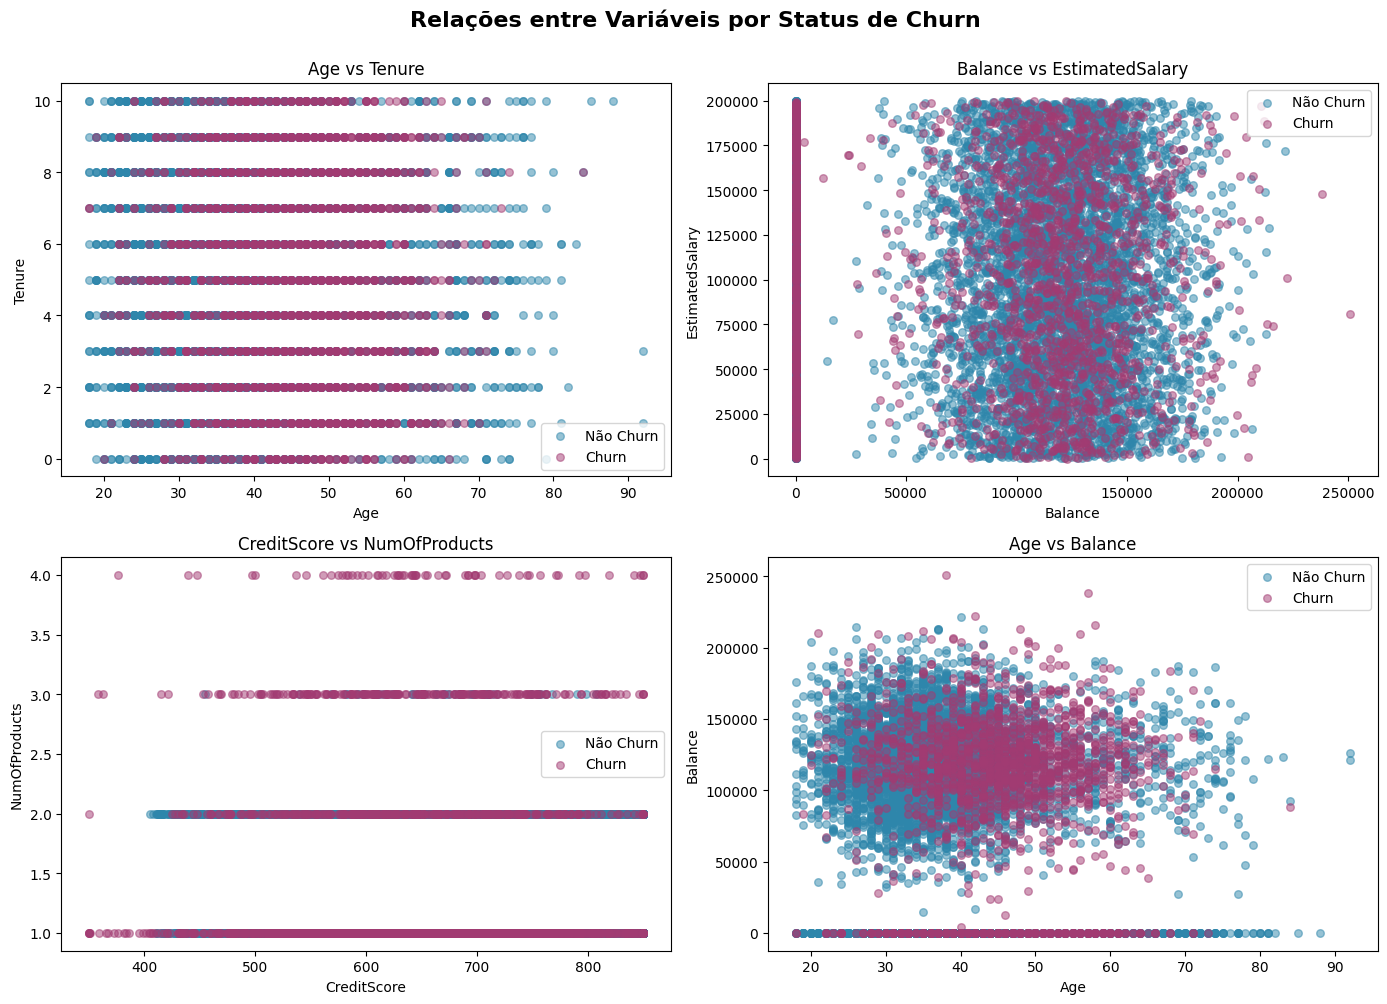

In [14]:
# Scatter plots para visualizar correlações
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relações entre Variáveis por Status de Churn', 
             fontsize=16, fontweight='bold', y=1.00)

# Age vs Tenure
scatter1 = axes[0, 0].scatter(df[df['Exited']==0]['Age'], 
                              df[df['Exited']==0]['Tenure'], 
                              alpha=0.5, c='#2E86AB', label='Não Churn', s=30)
scatter2 = axes[0, 0].scatter(df[df['Exited']==1]['Age'], 
                              df[df['Exited']==1]['Tenure'], 
                              alpha=0.5, c='#A23B72', label='Churn', s=30)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Tenure')
axes[0, 0].set_title('Age vs Tenure')
axes[0, 0].legend()

# Balance vs EstimatedSalary
axes[0, 1].scatter(df[df['Exited']==0]['Balance'], 
                   df[df['Exited']==0]['EstimatedSalary'], 
                   alpha=0.5, c='#2E86AB', label='Não Churn', s=30)
axes[0, 1].scatter(df[df['Exited']==1]['Balance'], 
                   df[df['Exited']==1]['EstimatedSalary'], 
                   alpha=0.5, c='#A23B72', label='Churn', s=30)
axes[0, 1].set_xlabel('Balance')
axes[0, 1].set_ylabel('EstimatedSalary')
axes[0, 1].set_title('Balance vs EstimatedSalary')
axes[0, 1].legend()

# CreditScore vs NumOfProducts
axes[1, 0].scatter(df[df['Exited']==0]['CreditScore'], 
                   df[df['Exited']==0]['NumOfProducts'], 
                   alpha=0.5, c='#2E86AB', label='Não Churn', s=30)
axes[1, 0].scatter(df[df['Exited']==1]['CreditScore'], 
                   df[df['Exited']==1]['NumOfProducts'], 
                   alpha=0.5, c='#A23B72', label='Churn', s=30)
axes[1, 0].set_xlabel('CreditScore')
axes[1, 0].set_ylabel('NumOfProducts')
axes[1, 0].set_title('CreditScore vs NumOfProducts')
axes[1, 0].legend()

# Age vs Balance
axes[1, 1].scatter(df[df['Exited']==0]['Age'], 
                   df[df['Exited']==0]['Balance'], 
                   alpha=0.5, c='#2E86AB', label='Não Churn', s=30)
axes[1, 1].scatter(df[df['Exited']==1]['Age'], 
                   df[df['Exited']==1]['Balance'], 
                   alpha=0.5, c='#A23B72', label='Churn', s=30)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Balance')
axes[1, 1].set_title('Age vs Balance')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


Os scatter plots revelam o "DNA" do churn:

1.  **O "Ponto Ideal" de Produtos:** O risco é altíssimo para quem tem **1 produto** e também para quem tem **3 ou 4**. A segurança está em ter **exatamente 2 produtos**. Score de crédito não altera isso.
2.  **Zona de Perigo:** O maior volume de cancelamentos ocorre na intersecção de **Idade 40-60 anos** com **Saldo de 100k-150k**.
3.  **Idade Domina a Lealdade:** Um cliente novo (0 anos de casa) e um antigo (10 anos) têm o mesmo risco se tiverem a mesma idade (40-60 anos). O tempo de casa não protege.

**Ação:** A melhor estratégia é converter clientes de 1 produto (especialmente os de meia-idade com saldo alto) para 2 produtos.

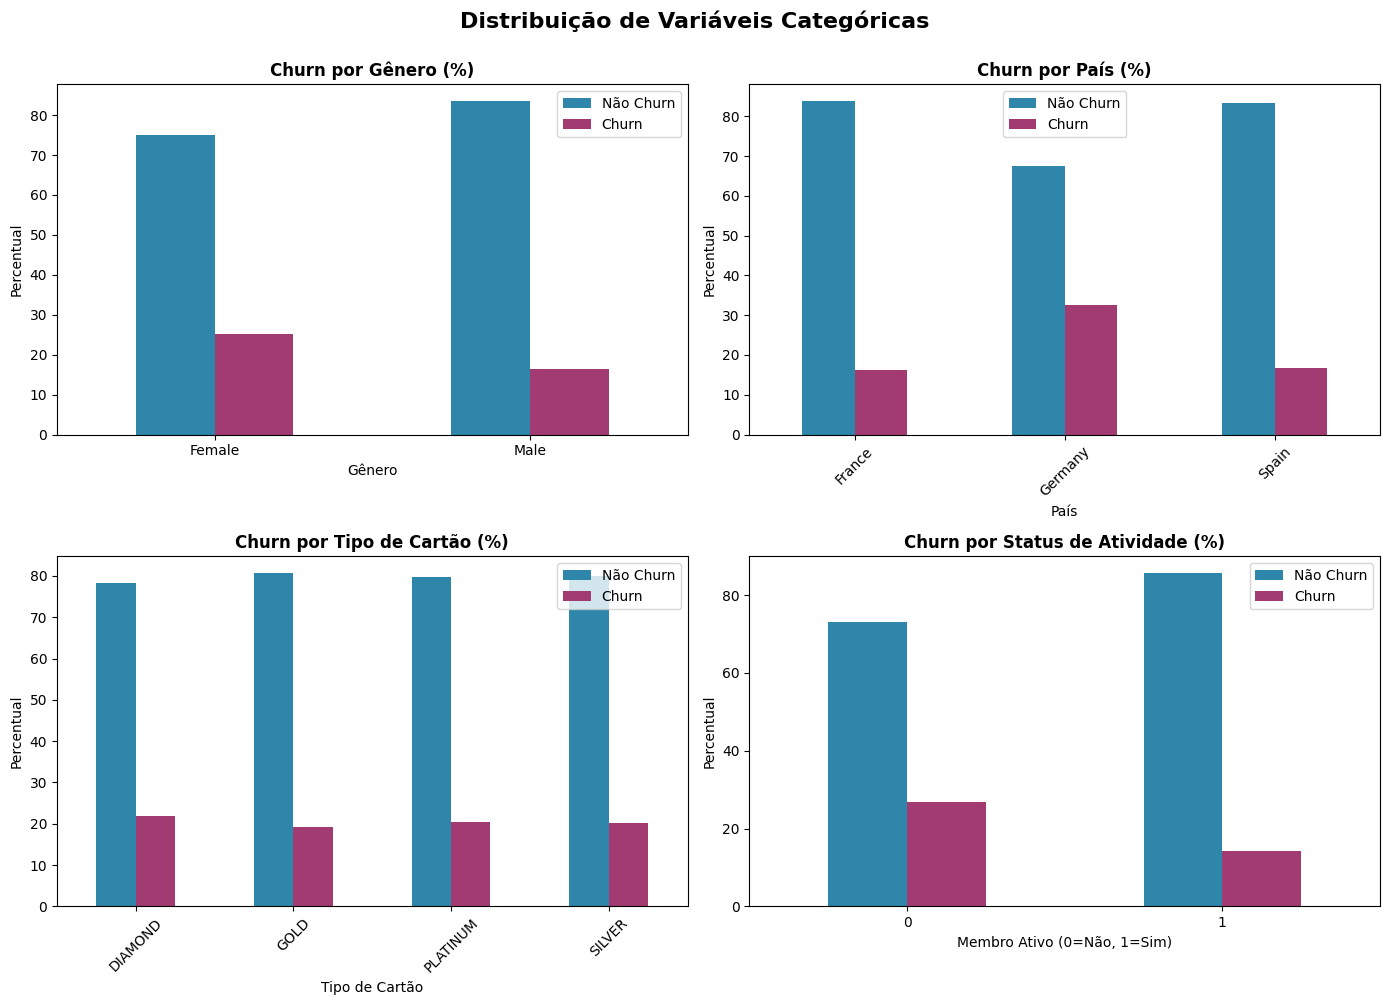

In [15]:
# Variáveis categóricas
categorical_vars = ['Gender', 'Geography', 'Card Type', 'IsActiveMember']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribuição de Variáveis Categóricas', 
             fontsize=16, fontweight='bold', y=1.00)

# Gender
gender_churn = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0, 0], color=['#2E86AB', '#A23B72'])
axes[0, 0].set_title('Churn por Gênero (%)', fontweight='bold')
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].set_ylabel('Percentual')
axes[0, 0].legend(['Não Churn', 'Churn'])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Geography
geo_churn = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
geo_churn.plot(kind='bar', ax=axes[0, 1], color=['#2E86AB', '#A23B72'])
axes[0, 1].set_title('Churn por País (%)', fontweight='bold')
axes[0, 1].set_xlabel('País')
axes[0, 1].set_ylabel('Percentual')
axes[0, 1].legend(['Não Churn', 'Churn'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Card Type
card_churn = pd.crosstab(df['Card Type'], df['Exited'], normalize='index') * 100
card_churn.plot(kind='bar', ax=axes[1, 0], color=['#2E86AB', '#A23B72'])
axes[1, 0].set_title('Churn por Tipo de Cartão (%)', fontweight='bold')
axes[1, 0].set_xlabel('Tipo de Cartão')
axes[1, 0].set_ylabel('Percentual')
axes[1, 0].legend(['Não Churn', 'Churn'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# IsActiveMember
active_churn = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100
active_churn.plot(kind='bar', ax=axes[1, 1], color=['#2E86AB', '#A23B72'])
axes[1, 1].set_title('Churn por Status de Atividade (%)', fontweight='bold')
axes[1, 1].set_xlabel('Membro Ativo (0=Não, 1=Sim)')
axes[1, 1].set_ylabel('Percentual')
axes[1, 1].legend(['Não Churn', 'Churn'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


Os dados apontam alvos claros para ação:

1.  **Foco Geográfico:** A **Alemanha** é o ponto crítico, com o dobro de churn (~32%) dos outros países. A operação lá precisa de revisão urgente.
2.  **Perfil de Risco:** **Mulheres** cancelam mais (~25%) que homens (~16%).
3.  **Engajamento é Chave:** Clientes **Inativos** têm o dobro de chance de sair. Ativar o cliente reduz o risco pela metade.
4.  **Irrelevância:** O nível do cartão (Gold, Platinum, etc.) não faz diferença nenhuma na retenção.

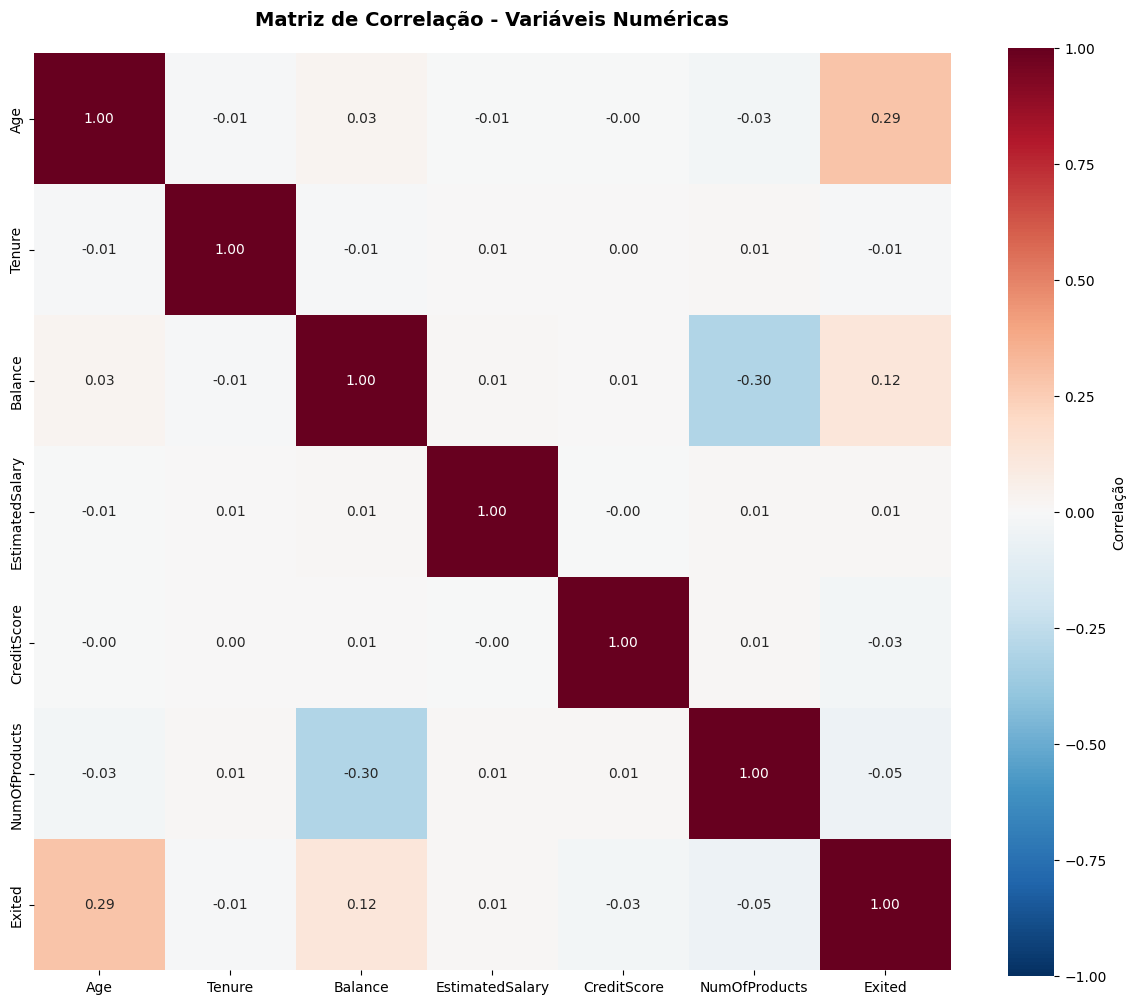

In [16]:
# Calcular correlação
fig, ax = plt.subplots(figsize=(12, 10))

numeric_df = df[numeric_vars + ['Exited']].copy()
corr = numeric_df.corr()

# Heatmap de correlação
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, ax=ax, cbar_kws={'label': 'Correlação'},
            vmin=-1, vmax=1)

ax.set_title('Matriz de Correlação - Variáveis Numéricas', 
             fontweight='bold', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


A Matriz de Correlação reforça a importância de certas variáveis e desmistifica outras:

Age (Idade) é a Chave (0.29): É a variável numérica com a correlação mais forte com a saída (Exited). Clientes mais velhos têm maior probabilidade de churn.

Balance (Saldo) também importa (0.12): Correlação positiva. Saldo maior = maior risco.

Correlação Negativa Curiosa (-0.30): Entre Balance e NumOfProducts.

Interpretação: Clientes com muitos produtos tendem a ter saldo menor.

Hipótese: Talvez clientes com muitos produtos (3 ou 4) estejam endividados ou usando o banco apenas para crédito, não para guardar dinheiro.

Variáveis "Neutras" (0.00 a 0.01): Tenure (Tempo), EstimatedSalary (Salário) e CreditScore têm correlação praticamente zero com o Churn. Isso confirma que essas variáveis, isoladamente, são inúteis para prever a saída.

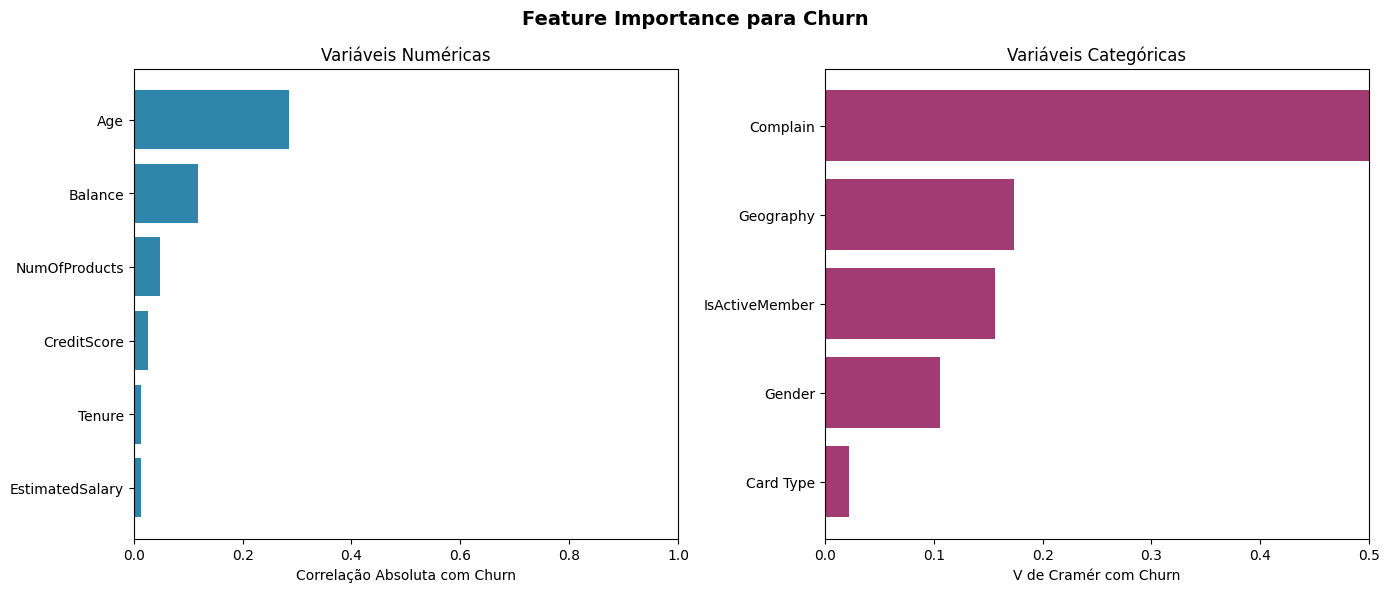

In [18]:
from scipy import stats

# Calcular V de Cramér para variáveis categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim <= 0:
        return 0
    return np.sqrt(chi2_stat / (n * min_dim))

# Correlação absoluta com Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Feature Importance para Churn', fontsize=14, fontweight='bold')

# Variáveis numéricas - correlação
numeric_importance = []
for var in numeric_vars:
    corr = abs(df[var].corr(df['Exited']))
    numeric_importance.append({'var': var, 'importance': corr})

numeric_imp_df = pd.DataFrame(numeric_importance).sort_values('importance', ascending=True)
axes[0].barh(numeric_imp_df['var'], numeric_imp_df['importance'], color='#2E86AB')
axes[0].set_xlabel('Correlação Absoluta com Churn')
axes[0].set_title('Variáveis Numéricas')
axes[0].set_xlim(0, 1)

# Variáveis categóricas - V de Cramér
categorical_importance = []
for var in ['Gender', 'Geography', 'Card Type', 'IsActiveMember', 'Complain']:
    if var in df.columns:
        v = cramers_v(df[var], df['Exited'])
        categorical_importance.append({'var': var, 'importance': v})

cat_imp_df = pd.DataFrame(categorical_importance).sort_values('importance', ascending=True)
axes[1].barh(cat_imp_df['var'], cat_imp_df['importance'], color='#A23B72')
axes[1].set_xlabel('V de Cramér com Churn')
axes[1].set_title('Variáveis Categóricas')
axes[1].set_xlim(0, 0.5)

plt.tight_layout()
plt.show()


O gráfico define as prioridades absolutas para combater o churn:

Reclamação (Complain): É o fator mais poderoso de todos. Se o cliente reclama, a chance de saída é quase certa. Resolver reclamações é a ação nº 1.

Idade (Age): É o principal fator numérico. Clientes mais velhos correm muito mais risco.

Geografia e Atividade: Onde o cliente mora (Alemanha) e se ele é ativo no banco são fatores secundários importantes.

Irrelevantes: Salário, Score de Crédito, Tempo de Casa e Tipo de Cartão não influenciam a decisão de saída.

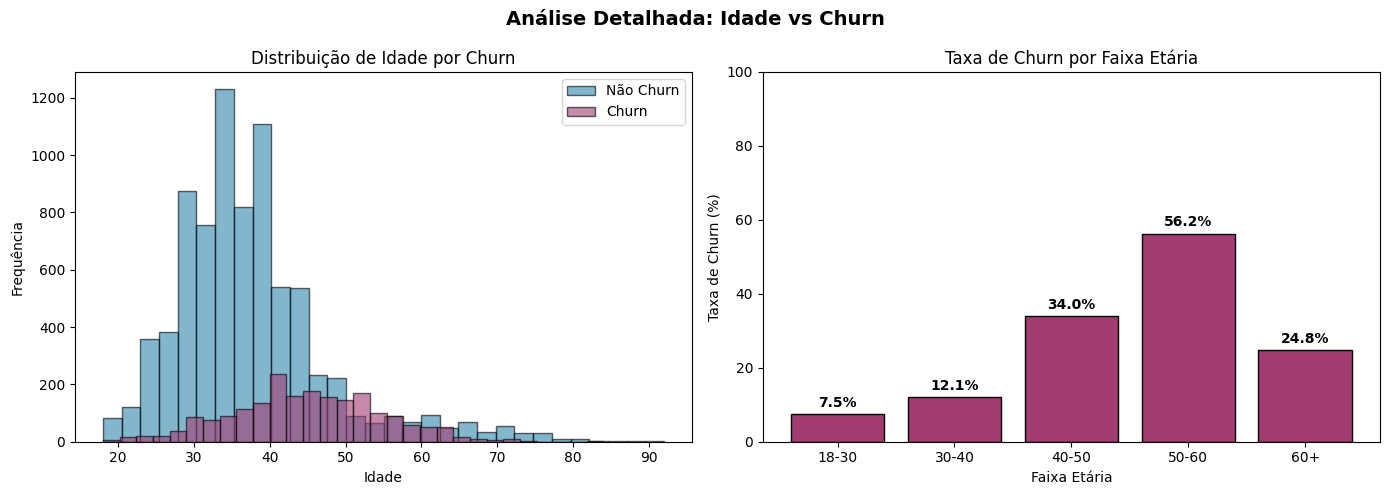

In [ ]:
# Análise detalhada de Age - variável mais importante
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Análise Detalhada: Idade vs Churn', fontsize=14, fontweight='bold')

# Histograma sobreposto
axes[0].hist(df[df['Exited']==0]['Age'], bins=30, alpha=0.6, 
             label='Não Churn', color='#2E86AB', edgecolor='black')
axes[0].hist(df[df['Exited']==1]['Age'], bins=30, alpha=0.6, 
             label='Churn', color='#A23B72', edgecolor='black')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição de Idade por Churn')
axes[0].legend()

# Taxa de churn por faixa etária
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

churn_by_age = df.groupby('age_group')['Exited'].agg(['sum', 'count'])
churn_by_age['churn_rate'] = (churn_by_age['sum'] / churn_by_age['count']) * 100

axes[1].bar(age_labels, churn_by_age['churn_rate'], color='#A23B72', edgecolor='black')
axes[1].set_xlabel('Faixa Etária')
axes[1].set_ylabel('Taxa de Churn (%)')
axes[1].set_title('Taxa de Churn por Faixa Etária')
axes[1].set_ylim(0, 100)

# Adicionar valores nas barras
for i, v in enumerate(churn_by_age['churn_rate']):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Esta análise focada na **Idade** revela a dinâmica mais clara de todo o dataset:

1.  **A Curva do Risco:** O risco de churn não é linear; ele explode na meia-idade.
    *   **18-30 anos:** Zona Segura (7.5% de churn). Clientes jovens são fiéis.
    *   **30-40 anos:** Zona de Alerta (12.1%). O risco começa a subir.
    *   **40-50 anos:** Zona de Perigo (34.0%). 1 em cada 3 clientes sai.
    *   **50-60 anos:** **Zona Crítica (56.2%)**. Mais da metade dos clientes nessa faixa etária abandona o banco. Isso é catastrófico.

2.  **Sobreposição de Histogramas (Esquerda):**
    *   O pico de clientes "fiéis" (azul) está nos 30-35 anos.
    *   O pico de clientes que "saem" (roxo) está nos 45-50 anos.
    *   O banco adquire bem os jovens, mas falha miseravelmente em retê-los conforme amadurecem.

3.  **Queda na Terceira Idade (60+):**
    *   Após os 60 anos, a taxa de churn cai novamente para 24.8%. Quem ficou até os 60, provavelmente fica para sempre (aposentadoria, inércia). O problema é a "travessia do deserto" dos 40 aos 60 anos.

**Resumo:** O banco tem um problema grave de produto/serviço para pessoas de **40 a 60 anos**. Investigar se faltam produtos de investimento, aposentadoria ou crédito imobiliário competitivos para esse perfil maduro.